# Introdução


## Analisando Vendas

In [1]:
import pandas as pd


In [2]:
dfAlucar = pd.read_csv('material curso - Time Series/alucar.csv')
dfAlucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
dfAlucar.shape

(24, 2)

In [4]:
dfAlucar.isnull().sum().sum()

0

In [5]:
dfAlucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
dfAlucar['mes'] = pd.to_datetime(dfAlucar['mes'])

In [7]:
dfAlucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
sns.set_palette("Accent")
sns.set_style("whitegrid")

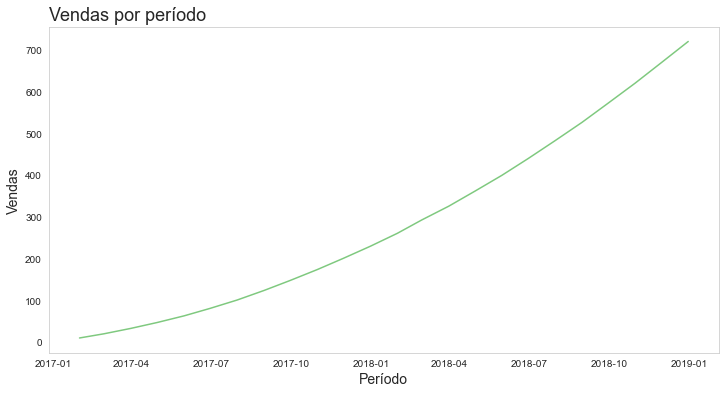

In [10]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='mes', y='vendas', data=dfAlucar, )
ax.set_title("Vendas por período", fontsize = 18, loc='left')
ax.set_ylabel("Vendas", fontsize = 14)
ax.set_xlabel("Período", fontsize = 14)
ax.grid(False)

plt.show()


### Decompondo a Série Temporal

In [11]:
dfAlucar['aumento'] = dfAlucar['vendas'].diff()
dfAlucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [12]:
'''dfAlucar.fillna('0', inplace=True)
dfAlucar.head()'''

"dfAlucar.fillna('0', inplace=True)\ndfAlucar.head()"

In [13]:
dfAlucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [14]:
'''dfAlucar['aumento'] = dfAlucar['aumento'].astype('int64')'''

"dfAlucar['aumento'] = dfAlucar['aumento'].astype('int64')"

In [15]:
def plotar(titulo, labelx, labely, x,y, data):
    plt.figure(figsize=(12,6))
    ax = sns.lineplot(x=x, y=y, data=data)
    ax.set_title(titulo, fontsize = 20,loc='left')
    ax.set_ylabel(labely, fontsize = 14)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.grid(False)
    plt.show()


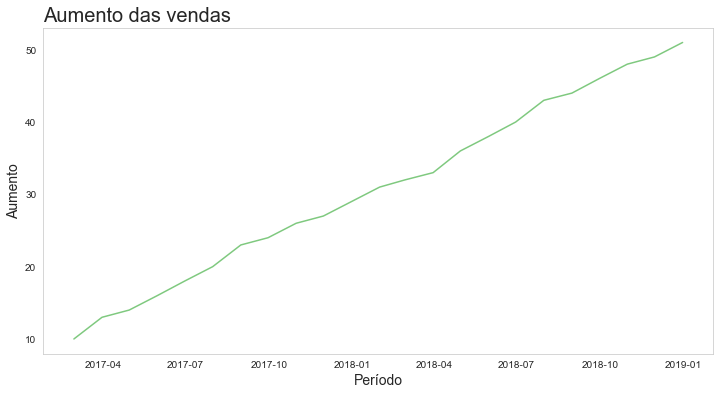

In [16]:
plotar("Aumento das vendas", "Período", "Aumento", "mes", "aumento", dfAlucar)

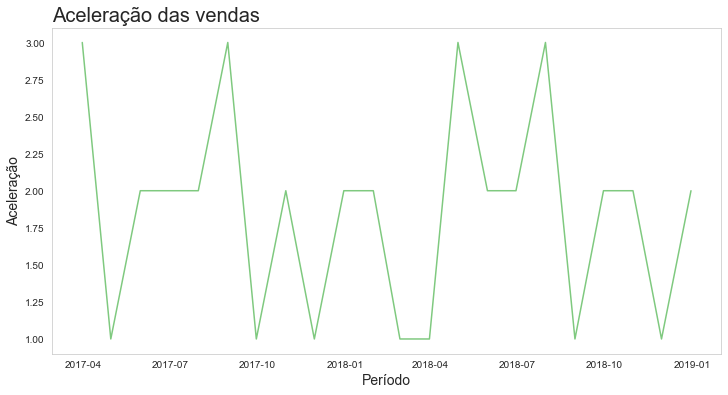

In [17]:
dfAlucar['aceleracao'] = dfAlucar['aumento'].diff()

plotar("Aceleração das vendas", "Período", "Aceleração", "mes", "aceleracao", dfAlucar)

In [18]:
dfAlucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


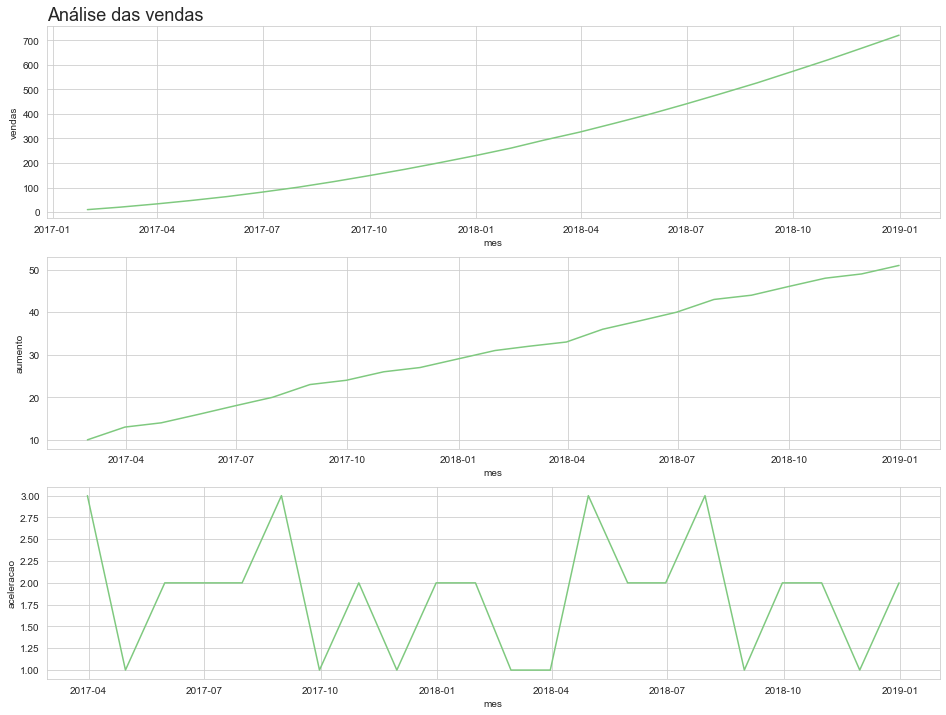

In [19]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise das vendas", fontsize = 18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=dfAlucar, ax=ax)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=dfAlucar, ax=ax)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=dfAlucar, ax=ax)

* As vendas estão cresecendo em todo o período analisado.

In [20]:
def plot_comparacao(x, y1,y2,y3, data, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=data, ax=ax)
    ax = plt.subplot(3,1,2)
    ax = sns.lineplot(x=x, y=y2, data=data, ax=ax)
    ax = plt.subplot(3,1,3)
    ax = sns.lineplot(x=x, y=y3, data=data, ax=ax)
    plt.show()
    

### Autocorrelação

In [21]:
from pandas.plotting import autocorrelation_plot

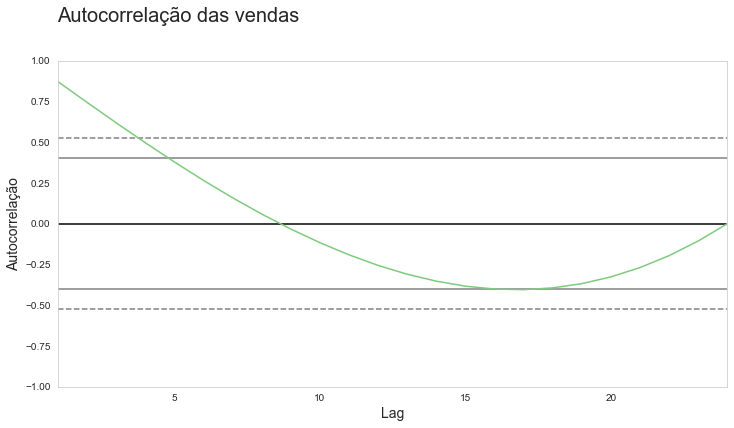

In [22]:
ax = autocorrelation_plot(dfAlucar['vendas'])
ax.figure.set_size_inches(12,6)
ax.set_title("Autocorrelação das vendas", fontsize = 20, x = 0.18, y = 1.1)
ax.set_ylabel("Autocorrelação", fontsize = 14)
ax.set_xlabel("Lag", fontsize = 14)     
plt.show()

## Assinantes


In [28]:
assinantes= pd.read_csv('material curso - Time Series/newsletter_alucar.csv')
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [29]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [30]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [31]:
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [33]:
assinantes.isnull().sum()

mes           0
assinantes    0
dtype: int64

In [45]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [46]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


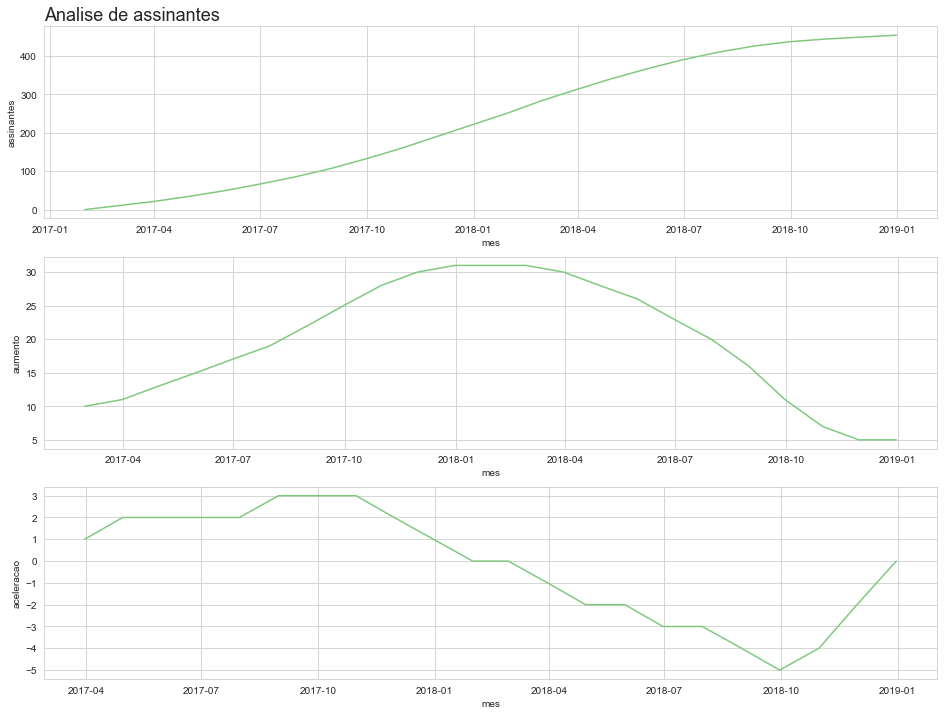

In [47]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Analise de assinantes')

## Sazionalidade

In [49]:
dfChocolura = pd.read_csv('material curso - Time Series/chocolura.csv')
dfChocolura

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [50]:
dfChocolura.dtypes

mes       object
vendas     int64
dtype: object

In [51]:
dfChocolura['mes'] = pd.to_datetime(dfChocolura['mes'])

In [52]:
dfChocolura.isnull().sum()

mes       0
vendas    0
dtype: int64

In [54]:
dfChocolura['aumento'] = dfChocolura['vendas'].diff()	
dfChocolura['aceleracao'] = dfChocolura['aumento'].diff()

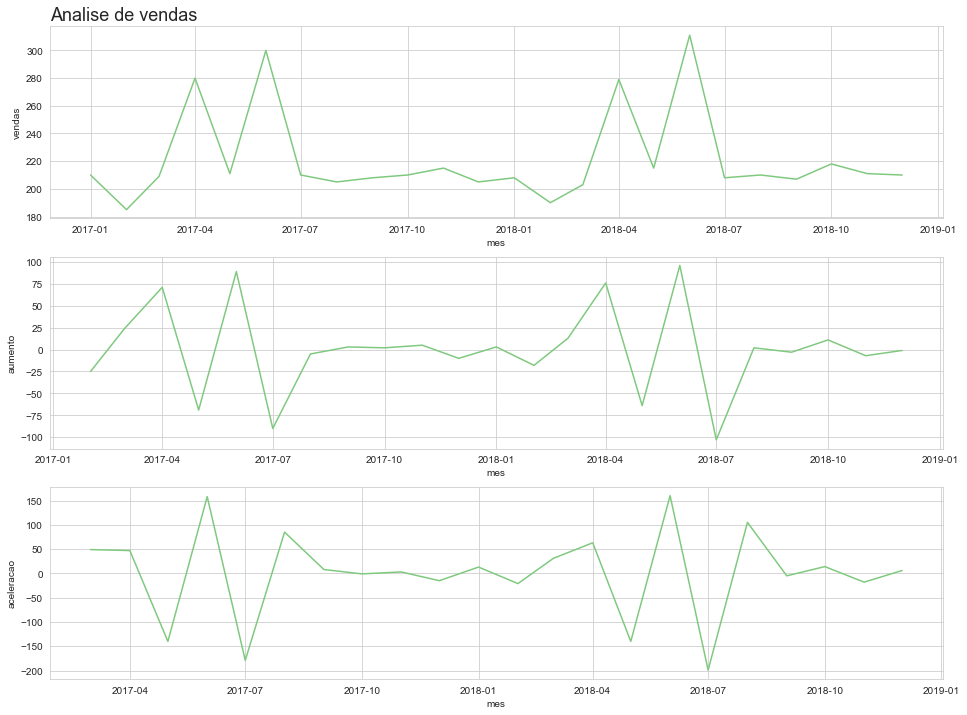

In [55]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', dfChocolura, 'Analise de vendas')

### Vendas diárias Outubro e Novembro

In [57]:
dfVendas = pd.read_csv('material curso - Time Series/vendas_por_dia.csv')
dfVendas

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [58]:
dfVendas.dtypes

dia       object
vendas     int64
dtype: object

In [67]:
dfVendas['dia'] = pd.to_datetime(dfVendas['dia'])

In [68]:
dfVendas.isnull().sum()

dia       0
vendas    0
dtype: int64

In [71]:
dfVendas['aumento'] = dfVendas['vendas'].diff()
dfVendas['aceleracao'] = dfVendas['aumento'].diff()

In [74]:
dfVendas.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


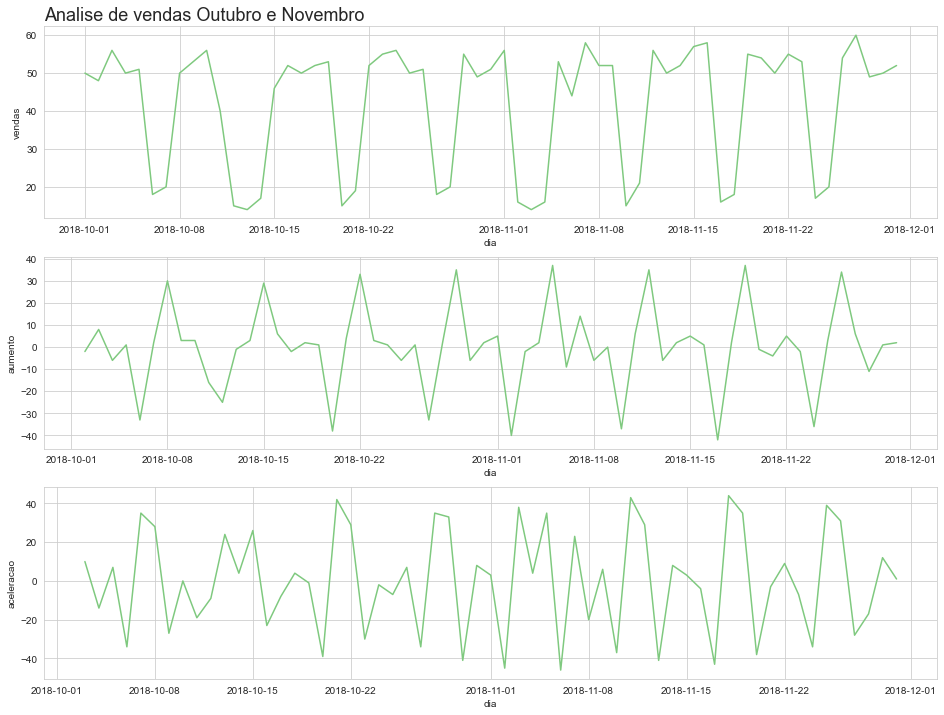

In [75]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', dfVendas, 'Analise de vendas Outubro e Novembro')

## Analisando sazionalidade

In [81]:
dfVendas['dia_da_Semana'] = dfVendas['dia'].dt.day_name()

In [82]:
dfVendas

,dia,vendas,aumento,aceleracao,dia_da_Semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)